# Use the prediction endpoint
## Get the prediction key and project id
To get the key, navigate to the Custom Vision web page and select the gear icon in the upper right. In the Accounts section, copy the value from the Prediction Key field.

![Keys](images/training-prediction-keys.png)




In [18]:
#PREDICTION_KEY = '<your key>'
#PROJECT_ID = '<your project id>'

## Display test images

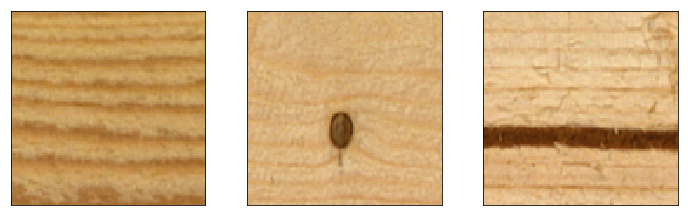

In [35]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

images_dir = 'Samples/testing'
images = [os.path.join(images_dir, file) for file in os.listdir(images_dir)]

figsize=(10, 8)
fig, axis = plt.subplots(len(images)//3, 3, figsize=figsize)
fig.tight_layout()
for ax, image_path in zip(axis.flat[0:], images):
    image = Image.open(image_path)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(image)


## Call the prediction endpoint

In [36]:
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models

def classify_image(image_path):
    predictor = prediction_endpoint.PredictionEndpoint(PREDICTION_KEY)
    with open(image_path, mode='rb') as image:
      result = predictor.predict_image(PROJECT_ID, image)
    
    probs = [prediction.probability for prediction in result.predictions]
    max_prob = max(probs)
    max_index = probs.index(max_prob)
    tag = result.predictions[max_index].tag_name

    return tag, max_prob
    

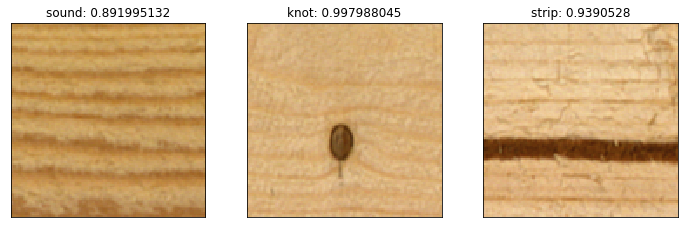

In [37]:
figsize=(10, 8)
fig, axis = plt.subplots(len(images)//3, 3, figsize=figsize)
fig.tight_layout()
for ax, image_path in zip(axis.flat[0:], images):
    tag, prob = classify_image(image_path)
    ax.set_title(tag + ': ' + str(prob))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    image = Image.open(image_path)
    ax.imshow(image)

